In [1]:
# library imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re


In [2]:
data = pd.read_excel("C:/Users/XBOX2/Desktop/project ds tools/DataSetScraping3.xlsx")

In [3]:
data.head(10)


,Brand,Model,Options,Year,Milage,Transmission,Location,Color,Fuel,Price,Post Date
0,شيفروليه ...,كروز ...,جميع الكماليات / اتوماتيك\tهاى لاين,2016,"63,000 كم",أتوماتيك‎,الإسكندرية,بترولي,بنزين,"63,000 جنيه",2025-04-18
1,دى اس ...,DS7,NaN,2020,"31,000 كم",أتوماتيك‎,شبرا,أسود,بنزين,"1,650,000 جنيه",2025-04-19
2,سايبا ...,برايد ...,NaN,2020,"31,000 كم",أتوماتيك‎,شبرا,أسود,بنزين,"170,000 جنيه",2025-04-18
3,دايو ...,نوبيرا 2 ...,NaN,2000,"158,000 كم",أتوماتيك‎,مدينة نصر,بني,بنزين,"280,000 جنيه",2025-04-18
4,بي ام دبليو ...,X3,اتوماتيك / Comfort,2018,168 كم,أتوماتيك‎,6 أكتوبر,فضي,بنزين,"1,800,000 جنيه",2025-04-18
5,مرسيدس ...,A 180,اتوماتيك / Progressive,2021,"73,000 كم",أتوماتيك‎,طنطا,أسود,بنزين,"2,000,000 جنيه",2025-04-18
6,شيفروليه ...,أوبترا ...,اتوماتيك / Highline,2023,"55,000 كم",أتوماتيك‎,6 أكتوبر,بترولي,بنزين,"635,000 جنيه",2025-04-18
7,سكودا ...,اوكتافيا A4 ...,اتوماتيك / Highline,2023,"55,000 كم",أتوماتيك‎,6 أكتوبر,بترولي,بنزين,"520,000 جنيه",2025-04-19
8,جيلي ...,X7,NaN,2020,"162,000 كم",أتوماتيك‎,العاشر من رمضان,أبيض,بنزين,"750,000 جنيه",2025-04-19
9,رينو ...,كليو ...,NaN,2008,"192,000 كم",مانيوال,6 أكتوبر,فضي,بنزين,"250,000 جنيه",2025-04-19


In [4]:
data.isna().sum()

Brand               0
Model               0
Options         15697
Year                0
Milage             12
Transmission        0
Location            0
Color               0
Fuel                0
Price               0
Post Date           0
dtype: int64

In [5]:
df = data.copy()

In [6]:
df.drop(columns=['Options'],inplace = True)

In [7]:
df[df['Milage'].isna()]

,Brand,Model,Year,Milage,Transmission,Location,Color,Fuel,Price,Post Date
766,فولكس فاغن ...,تيجون ...,2025,NaN,أتوماتيك‎,الإسكندرية,أبيض,بنزين,"2,625,000 جنيه",2025-04-19
804,كيا ...,كارنفال ...,2025,NaN,أتوماتيك‎,مدينة الشيخ زايد,فضي,بنزين,"3,590,000 جنيه",2025-04-19
4895,سكودا ...,كودياك ...,2024,NaN,أتوماتيك‎,التجمع - القاهرة الجديدة,أبيض,بنزين,"3,250,000 جنيه",2025-02-25
5986,روكس ...,01,2025,NaN,أتوماتيك‎,الغردقة,أبيض,بنزين,"3,750,000 جنيه",2025-03-25
5994,سكودا ...,كودياك ...,2025,NaN,أتوماتيك‎,الفيوم,أبيض,بنزين,"2,500,000 جنيه",2025-03-25
6552,مرسيدس ...,C 180,2023,NaN,أتوماتيك‎,مصر الجديدة,فضي,بنزين,"2,950,000 جنيه",2025-03-23
7976,هيونداي ...,افانتي ...,2024,NaN,أتوماتيك‎,القاهرة,فضي,بنزين,"1,730,000 جنيه",2025-03-16
11306,هوندا ...,CRV,2024,NaN,أتوماتيك‎,الإسكندرية,فضي,بنزين,"2,950,000 جنيه",2025-02-25
11508,بيجو ...,3008,2025,NaN,أتوماتيك‎,ميت غمر,الأزرق الداكن,بنزين,"1,850,000 جنيه",2025-02-24
15599,كيا ...,سيراتو ...,2024,NaN,أتوماتيك‎,مدينة نصر,أبيض,بنزين,"1,400,000 جنيه",2025-01-31


In [8]:
df['Milage'].fillna(0 , inplace= True)

C:\Users\XBOX2\AppData\Local\Temp\ipykernel_24228\3000532101.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Milage'].fillna(0 , inplace= True)


In [9]:
df.duplicated().sum()

np.int64(146)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
index= df[(df['Transmission'] != 'أتوماتيك\u200e') & (df['Transmission'] != 'مانيوال') & (df['Transmission'] !='DSG')].index
df[(df['Transmission'] != 'أتوماتيك\u200e') & (df['Transmission'] != 'مانيوال') & (df['Transmission'] !='DSG')]


,Brand,Model,Year,Milage,Transmission,Location,Color,Fuel,Price,Post Date
482,مرسيدس ...,E 200 AMG,2024,أتوماتيك‎,مصر الجديدة,فيراني,سيدان,بنزين,"5,600,000 جنيه",2025-04-19
575,سكودا ...,كودياك ...,2025,أتوماتيك‎,العبور,أبيض,4x4,بنزين,"3,200,000 جنيه",2025-04-18
576,هيونداي ...,إلنترا اتش دى ...,2025,أتوماتيك‎,العبور,أبيض,4x4,بنزين,"700,000 جنيه",2025-04-18
956,مرسيدس ...,CLA 200,2025,أتوماتيك‎,التجمع - القاهرة الجديدة,أسود,سيدان,بنزين,"3,500,000 جنيه",2025-04-17
1027,تويوتا ...,فورتشنر ...,2024,أتوماتيك‎,العبور,أبيض,4x4,بنزين,"3,850,000 جنيه",2025-04-17
1081,بى واى دى‬ ...,سونج بلاس ...,2025,أتوماتيك‎,مدينة نصر,أسود,SUV,بنزين,"2,550,000 جنيه",2025-04-19
1124,مرسيدس ...,E 200,2025,أتوماتيك‎,التجمع - القاهرة الجديدة,رمادي,سيدان,بنزين,"6,250,000 جنيه",2025-04-19
1128,مرسيدس ...,GLC 300,2025,أتوماتيك‎,6 أكتوبر,أبيض,SUV,بنزين,"5,500,000 جنيه",2025-04-19
1391,تويوتا ...,هايلكس ...,2025,مانيوال,مدينة الشيخ زايد,أبيض,FULL,بنزين,"2,120,000 جنيه",2025-04-16
1392,اوبل ...,أسترا ...,2025,مانيوال,مدينة الشيخ زايد,أبيض,FULL,بنزين,"750,000 جنيه",2025-04-16


In [12]:
color = ['بترولي', 'أسود', 'بني', 'فضي', 'أبيض', 'رمادي', 'احمر',
       'الأزرق الداكن', 'أزرق', 'فيراني', 'برونزي', 'احمر غامق', 'شمبان',
       'سماوى', 'أخضر', 'ذهبي', 'موكا', 'زيتوني', 'برتقالى', 'اخضر غامق',
       'بنفسجي', 'بيج', 'اصفر', 'باذنجاني']
      
for i in index:
    if df.at[i,'Location'] in color: 
     df.at[i,'Color'] = df.at[i,'Location']
    if df.at[i,'Transmission'] not in ['أتوماتيك\u200e','مانيوال','DSG']:
       df.at[i,'Location'] = df.at[i,'Transmission']
    if df.at[i,'Milage'] in ['أتوماتيك\u200e','مانيوال']:
     df.at[i,'Transmission'] = df.at[i,'Milage']
     df.at[i,'Milage'] = 0

In [13]:
df['Milage'] = df['Milage'].astype(str)
all_number = []
for text in df['Milage']:
    number = re.findall(r'\d[\d,]*',text)
    for num in number:
        cleaned_number = int(num.replace(',',''))
        all_number.append(cleaned_number)
df['Milage'] = all_number

In [14]:
# fill data in mileage with 0 with the mean and filter the price that less than 100 0mean_value = df.loc[df['column_name'] != 0, 'column_name'].mean()
mean_value = df['Milage'].mean()
mean_value
df['Milage'] = df['Milage'].replace(0, mean_value)


In [15]:
# filter the year that has value zero with the drop
# drop raws that have 0 in year column
df[df['Year'] == 0]     
df.drop(index= 4857, inplace = True)   
df.drop(index= 18767, inplace = True)   
                                      # 4857  # 18767

In [16]:
# price column
# remove the word جنيه
cleaned_prices = [re.sub(r' جنيه$', '', price) for price in df['Price']]


In [17]:
# remove the comma
cleaned_prices = [re.sub(r',','',price)for price in cleaned_prices]

In [18]:
# convert to int
cleaned_prices = [int(price) for price in cleaned_prices]

In [19]:
df['Price'] = cleaned_prices

In [20]:
df['Price'].describe()

count    2.240900e+04
mean     8.345673e+05
std      8.573506e+05
min      0.000000e+00
25%      3.750000e+05
50%      6.250000e+05
75%      9.600000e+05
max      2.900000e+07
Name: Price, dtype: float64

In [21]:
df['Price'].describe()

count    2.240900e+04
mean     8.345673e+05
std      8.573506e+05
min      0.000000e+00
25%      3.750000e+05
50%      6.250000e+05
75%      9.600000e+05
max      2.900000e+07
Name: Price, dtype: float64

In [22]:
# filter the price that less than 100000
df['Price'] = df['Price'].astype(int)
df = df[df['Price']>100000]


In [23]:
df['Price'].describe()

count    2.188400e+04
mean     8.530179e+05
std      8.591490e+05
min      1.050000e+05
25%      3.950000e+05
50%      6.400000e+05
75%      9.800000e+05
max      2.900000e+07
Name: Price, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1d79dea02d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d79dea0550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d79dea0050>],
 'medians': [<matplotlib.lines.Line2D at 0x1d79dea07d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d79da90690>],
 'means': []}

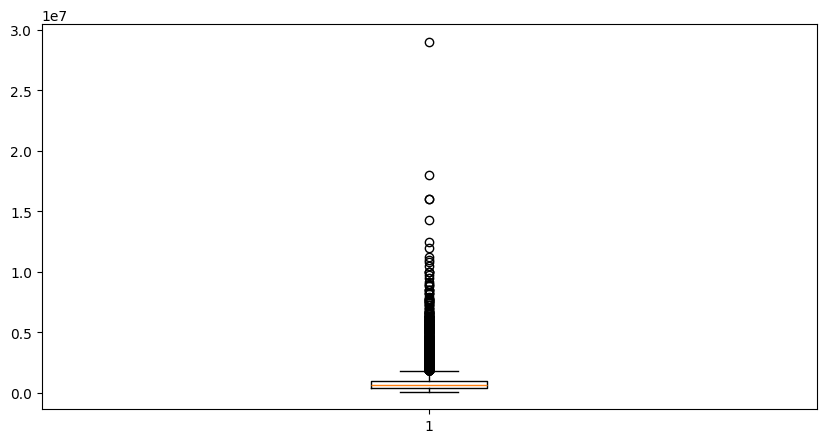

In [24]:
# box plot
plt.figure(figsize =(10,5))
plt.boxplot(df['Price'])

In [25]:
df.drop(df[(df['Year'] < 2010) & (df['Milage'] == mean_value)].index, inplace = True)
df.drop(df[(df['Year'] > 2020) & (df['Milage'] > 100000)].index, inplace = True)
df.drop(df[(df['Year'] <2023) & (df['Milage'] == mean_value)].index, inplace = True)

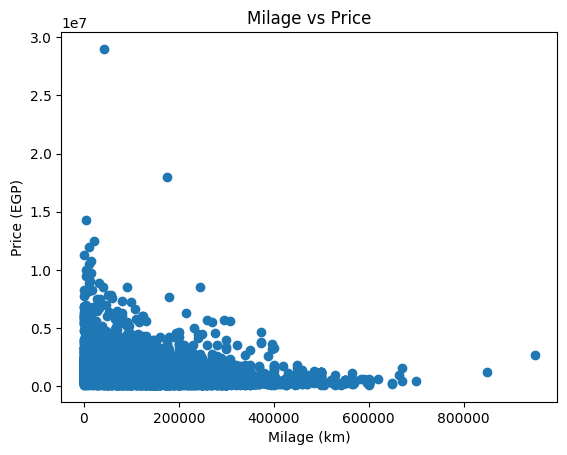

In [26]:
plt.scatter(df['Milage'], df['Price'])
plt.title('Milage vs Price')
plt.xlabel('Milage (km)')
plt.ylabel('Price (EGP)')
plt.show()

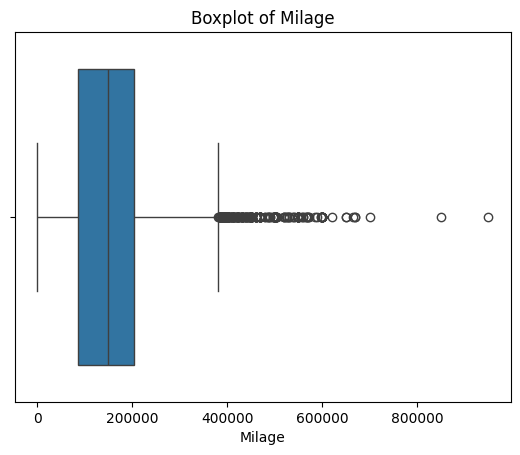

In [27]:
import seaborn as sns

# رسم مخطط الصندوق لتحليل القيم المتطرفة
sns.boxplot(x=df['Milage'])
plt.title('Boxplot of Milage')
plt.show()